In [1]:
!pip install pandas numpy matplotlib statsmodels


              Value
DATE               
1985-01-01  72.5052
1985-02-01  70.6720
1985-03-01  62.4502
1985-04-01  57.4714
1985-05-01  55.3151


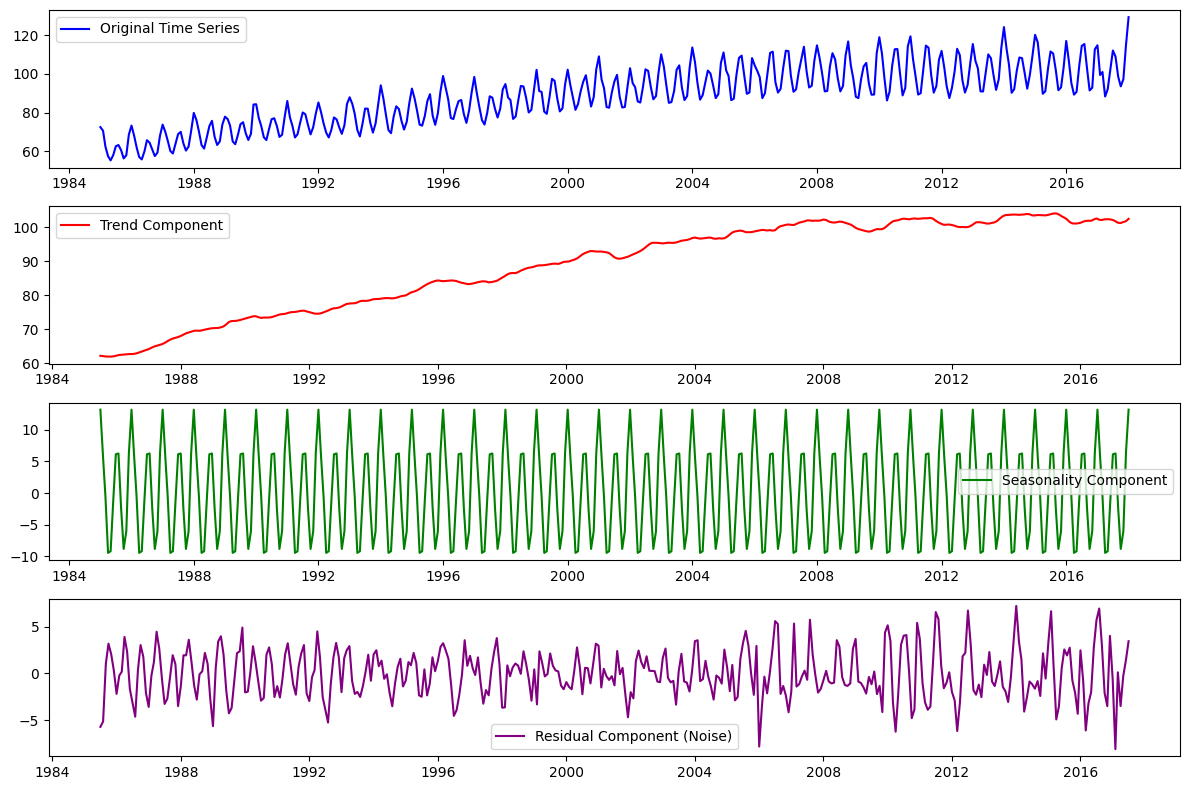

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
df = pd.read_csv("/content/Electric_Production.csv", parse_dates=["DATE"], index_col="DATE")

# Check column names and structure
print(df.head())

# Assuming the target variable is the second column
target_column = df.columns[0]

# Apply moving average smoothing for trend estimation
df[target_column + '_smooth'] = df[target_column].rolling(window=7, center=True).mean()

# Decompose time series into trend, seasonality, and residual
decomposition = seasonal_decompose(df[target_column], model='additive', period=12)

# Extract components
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

# Plot decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df[target_column], label='Original Time Series', color='blue')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend Component', color='red')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonality, label='Seasonality Component', color='green')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual Component (Noise)', color='purple')
plt.legend()

plt.tight_layout()
plt.show()
